# Import libraries and csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC 
from utils import save_model, save_scaler
import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
processed_data_df = pd.read_csv("csv\processed_data.csv")
processed_data_df.head()

,image_id,dx_type,age,sex,localization,diagnose,label
0,ISIC_0027419,3,80.0,1,11,2,0
1,ISIC_0025030,3,80.0,1,11,2,0
2,ISIC_0026769,3,80.0,1,11,2,0
3,ISIC_0025661,3,80.0,1,11,2,0
4,ISIC_0031633,3,75.0,1,4,2,0


In [3]:
processed_data_df.shape

(10015, 7)

In [4]:
processed_image_df = pd.read_csv("csv\processed_image.csv")
processed_image_df.head()

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,image_id
0,1348.032327,-569.294881,214.801509,455.310974,135.438972,-146.204089,41.665036,-43.661954,11.861526,-147.898032,...,-23.086906,-76.941561,78.410793,-21.301153,-4.034527,52.047491,18.442311,11.319238,75.953475,ISIC_0027419
1,1023.030243,-1845.724703,519.137691,9.765689,60.173202,-235.920803,-301.836552,-491.570476,92.935078,107.618550,...,-27.511214,-36.269473,-91.279530,62.851566,-123.029155,-59.261534,25.463101,4.347450,57.136307,ISIC_0025030
2,1188.147213,-641.933929,571.184219,250.532837,119.012680,-237.170729,181.692614,-99.621084,65.713410,79.234658,...,14.407396,-8.344908,-23.461838,23.767363,10.863464,47.256544,-27.483674,60.227803,-15.732902,ISIC_0026769
3,282.961598,-1711.011498,855.284810,20.080930,84.047112,-99.807243,-98.347823,-460.010357,142.026003,152.022235,...,25.765262,-31.585175,-86.120376,33.739869,-46.979626,62.517209,84.755505,67.737722,4.017393,ISIC_0025661
4,1523.066637,288.490875,-72.621347,819.649691,-1011.447033,235.506309,-241.467269,-757.725148,-648.157531,158.268381,...,-106.373544,121.131525,-16.805080,54.542117,-105.244240,-37.432755,51.533028,-81.189106,-55.644499,ISIC_0031633


In [5]:
processed_image_df.shape

(10015, 101)

Merge 2 processed dataframe

In [6]:
merged_df = pd.merge(processed_image_df, processed_data_df, on="image_id", how="inner")

In [7]:
merged_df.head()

,0,1,2,3,4,5,6,7,8,9,...,97,98,99,image_id,dx_type,age,sex,localization,diagnose,label
0,1348.032327,-569.294881,214.801509,455.310974,135.438972,-146.204089,41.665036,-43.661954,11.861526,-147.898032,...,18.442311,11.319238,75.953475,ISIC_0027419,3,80.0,1,11,2,0
1,1023.030243,-1845.724703,519.137691,9.765689,60.173202,-235.920803,-301.836552,-491.570476,92.935078,107.618550,...,25.463101,4.347450,57.136307,ISIC_0025030,3,80.0,1,11,2,0
2,1188.147213,-641.933929,571.184219,250.532837,119.012680,-237.170729,181.692614,-99.621084,65.713410,79.234658,...,-27.483674,60.227803,-15.732902,ISIC_0026769,3,80.0,1,11,2,0
3,282.961598,-1711.011498,855.284810,20.080930,84.047112,-99.807243,-98.347823,-460.010357,142.026003,152.022235,...,84.755505,67.737722,4.017393,ISIC_0025661,3,80.0,1,11,2,0
4,1523.066637,288.490875,-72.621347,819.649691,-1011.447033,235.506309,-241.467269,-757.725148,-648.157531,158.268381,...,51.533028,-81.189106,-55.644499,ISIC_0031633,3,75.0,1,4,2,0


# Train a Binary Classification SVM model

In [8]:
X = merged_df.drop(["image_id", "label", "diagnose", "dx_type"], axis=1)
y = merged_df["label"]

Standardize data

In [9]:
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)
print(scaler.feature_names_in_)
save_scaler(scaler, "../Scalers/scaler.joblib")

['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15'
 '16' '17' '18' '19' '20' '21' '22' '23' '24' '25' '26' '27' '28' '29'
 '30' '31' '32' '33' '34' '35' '36' '37' '38' '39' '40' '41' '42' '43'
 '44' '45' '46' '47' '48' '49' '50' '51' '52' '53' '54' '55' '56' '57'
 '58' '59' '60' '61' '62' '63' '64' '65' '66' '67' '68' '69' '70' '71'
 '72' '73' '74' '75' '76' '77' '78' '79' '80' '81' '82' '83' '84' '85'
 '86' '87' '88' '89' '90' '91' '92' '93' '94' '95' '96' '97' '98' '99'
 'age' 'sex' 'localization']
Model is existed at ../Scalers/scaler.joblib


Split dataframe into train and test sets

In [10]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, stratify=y, random_state=42)

In [11]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (7010, 103)
X_test shape:  (3005, 103)
y_train shape: (7010,)
y_test shape:  (3005,)


Use GridSearchCV to optimize hyperparameters and improve model accuracy

In [12]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(), param_grid, cv=10, scoring="accuracy", verbose=1)

In [13]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,1


In [14]:
binary_clf_best_model = grid.best_estimator_

In [15]:
binary_clf_best_model

,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Binary Classification Model Evaluation

In [16]:
y_pred = binary_clf_best_model.predict(X_test)
y_prob = binary_clf_best_model.decision_function(X_test)
auc = roc_auc_score(y_test, y_prob)
report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n\n")
print(f"ROC AUC: {auc*100:.2f}%\n\n")
print(f"Classification Report:\n{report}")

Accuracy: 82.86%


ROC AUC: 84.67%


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.97      0.90      2376
           1       0.72      0.30      0.42       629

    accuracy                           0.83      3005
   macro avg       0.78      0.63      0.66      3005
weighted avg       0.81      0.83      0.80      3005



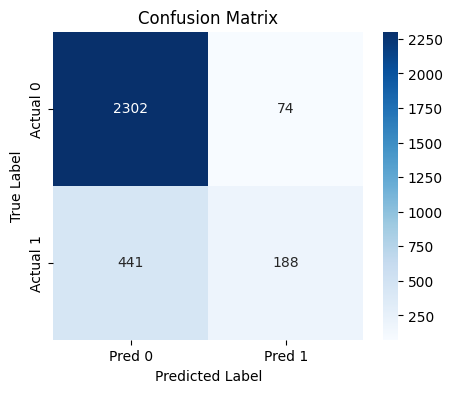

In [17]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Pred 0", "Pred 1"], yticklabels=["Actual 0", "Actual 1"])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

Save model for future use

In [18]:
save_model(binary_clf_best_model, "../Models/binary_clf_model.pkl")

Save Model at ../Models/binary_clf_model.pkl


In [19]:
loaded_model = joblib.load("../Models/binary_clf_model.pkl")

# Train a Multi-class Classification Model

In [20]:
y = merged_df["diagnose"]

In [21]:
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size=0.3, stratify=y, random_state=42)

In [26]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape:  {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape:  {y_test.shape}")

X_train shape: (7010, 103)
X_test shape:  (3005, 103)
y_train shape: (7010,)
y_test shape:  (3005,)


In [28]:
param_grid = {
    "C": [0.1, 1, 10],
    "kernel": ["linear", "rbf"],
    "gamma": ["scale", "auto"]
}

grid = GridSearchCV(SVC(), param_grid, cv=10, scoring="accuracy", verbose=2)

In [29]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.5s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   2.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   2.9s
[CV] END .....................C=0.1, gamma=sca

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto'], 'kernel': ['linear', 'rbf']}"
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,10
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,10


In [30]:
multiclass_clf_best_model = grid.best_estimator_

In [31]:
multiclass_clf_best_model

,C,10
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


# Multi-class Classification Model Evaluation

In [32]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score
from sklearn.preprocessing import label_binarize


y_pred = multiclass_clf_best_model.predict(X_test)
classes = multiclass_clf_best_model.classes_
y_test_bin = label_binarize(y_test, classes=classes)

if hasattr(multiclass_clf_best_model, "predict_proba"):
    y_prob = multiclass_clf_best_model.predict_proba(X_test)
else:
    y_prob = multiclass_clf_best_model.decision_function(X_test)

auc = roc_auc_score(y_test_bin, y_prob, multi_class="ovr")

report = classification_report(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%\n")
print(f"ROC AUC: {auc*100:.2f}%\n")
print(f"Classification Report:\n{report}")
print("Confusion Matrix:\n", cm)

Accuracy: 74.98%

ROC AUC: 83.81%

Classification Report:
              precision    recall  f1-score   support

           0       0.52      0.30      0.38        98
           1       0.55      0.43      0.48       154
           2       0.51      0.42      0.46       330
           3       0.60      0.18      0.27        34
           4       0.82      0.94      0.87      2012
           5       0.51      0.36      0.42       334
           6       0.57      0.19      0.28        43

    accuracy                           0.75      3005
   macro avg       0.58      0.40      0.45      3005
weighted avg       0.72      0.75      0.73      3005

Confusion Matrix:
 [[  29   11   13    1   34    9    1]
 [  11   66   22    1   36   15    3]
 [   5   12  139    0  135   39    0]
 [   1    5    6    6   13    2    1]
 [   4   15   58    2 1885   47    1]
 [   4    4   32    0  174  120    0]
 [   2    7    1    0   20    5    8]]


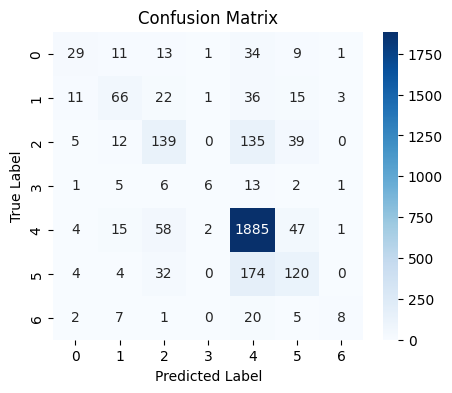

In [33]:
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [34]:
save_model(multiclass_clf_best_model, "../Models/multi_class_clf_model.pkl")

Save Model at ../Models/multi_class_clf_model.pkl


In [35]:
loaded_model = joblib.load("../Models/multi_class_clf_model.pkl")